In [1]:
!pip3 install imblearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df = df.drop(["Time", "Amount"], axis=1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


In [4]:
X = df.iloc[:, 0:28].values # features
y = df.iloc[:, 28].values # target

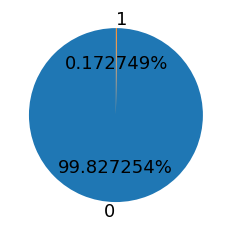

In [5]:
unique_elements, counts_elements = np.unique(y, return_counts = True)
plt.pie(counts_elements, labels=unique_elements, autopct='%1f%%', 
        startangle=90, textprops={'fontsize': 18})
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

unique_elements, counts_elements = np.unique(y_test, return_counts = True)
print(unique_elements, counts_elements)

[0 1] [85293   150]


In [7]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)


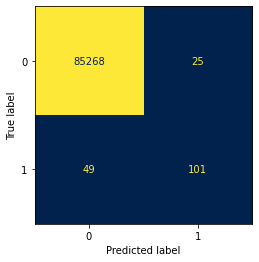

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap ="cividis", colorbar=False)

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy score: ", accuracy)
print("Precision score: ", precision)
print("Recall score: ", recall)
print("f1 score: ", f1)

Accuracy score:  0.999133925541004
Precision score:  0.8015873015873016
Recall score:  0.6733333333333333
f1 score:  0.7318840579710145


Text(0.5, 1.0, 'Recall vs Precision - Logistic Regression')

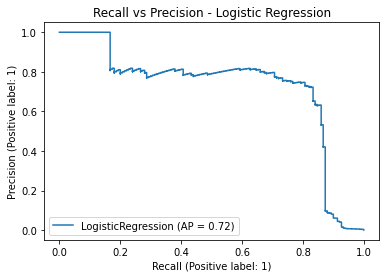

In [10]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(log_reg, X_test, y_test)
display.ax_.set_title("Recall vs Precision - Logistic Regression")

Text(0, 0.5, 'True Positive Rate')

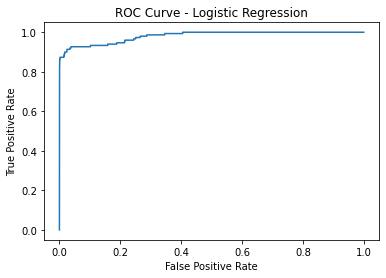

In [11]:
from sklearn.metrics import roc_curve

y_scores = log_reg.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

plt.plot(fpr, tpr)

plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [12]:
#Logistic regression
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


In [13]:
log_reg = LogisticRegression()
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred = log_reg.predict(X_test)

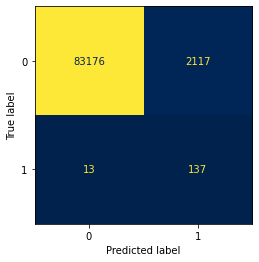

In [14]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap ="cividis", colorbar=False)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy score: ", accuracy)
print("Precision score: ", precision)
print("Recall score: ", recall)
print("f1 score: ", f1)

Accuracy score:  0.9750711000316
Precision score:  0.06078083407275954
Recall score:  0.9133333333333333
f1 score:  0.11397670549084858


Text(0.5, 1.0, 'Recall vs Precision - Logistic Regression (Oversampling)')

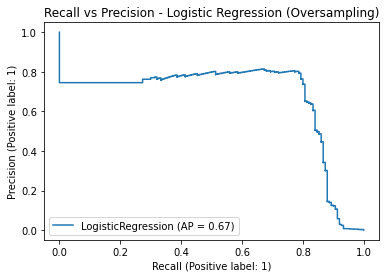

In [16]:
display = PrecisionRecallDisplay.from_estimator(log_reg, X_test, y_test)
display.ax_.set_title("Recall vs Precision - Logistic Regression (Oversampling)")

Text(0, 0.5, 'True Positive Rate')

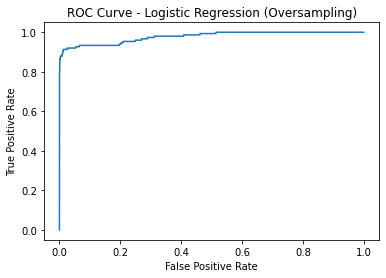

In [17]:
from sklearn.metrics import roc_curve

y_scores = log_reg.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

plt.plot(fpr, tpr)

plt.title("ROC Curve - Logistic Regression (Oversampling)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [18]:
log_reg = LogisticRegression(class_weight="balanced")
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

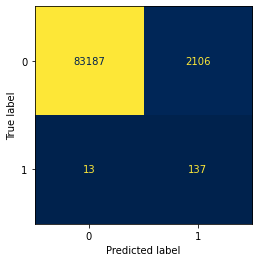

In [19]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap ="cividis", colorbar=False)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy score: ", accuracy)
print("Precision score: ", precision)
print("Recall score: ", recall)
print("f1 score: ", f1)

Accuracy score:  0.9751998408295589
Precision score:  0.06107891217119929
Recall score:  0.9133333333333333
f1 score:  0.11450062682824906


Text(0.5, 1.0, 'Recall vs Precision - Logistic Regression (Cost-sensitive Learning)')

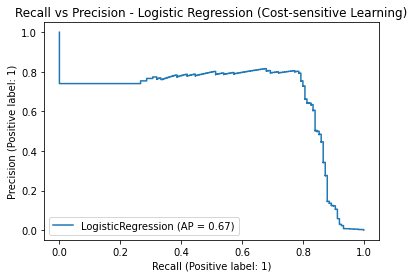

In [21]:
display = PrecisionRecallDisplay.from_estimator(log_reg, X_test, y_test)
display.ax_.set_title("Recall vs Precision - Logistic Regression (Cost-sensitive Learning)")

Text(0, 0.5, 'True Positive Rate')

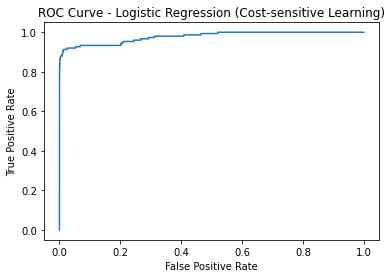

In [22]:
from sklearn.metrics import roc_curve

y_scores = log_reg.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

plt.plot(fpr, tpr)

plt.title("ROC Curve - Logistic Regression (Cost-sensitive Learning)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

log_reg = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=10)
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred = log_reg.predict(X_test)

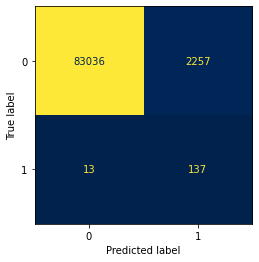

In [24]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap ="cividis", colorbar=False)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy score: ", accuracy)
print("Precision score: ", precision)
print("Recall score: ", recall)
print("f1 score: ", f1)

Accuracy score:  0.9734325807848507
Precision score:  0.057226399331662486
Recall score:  0.9133333333333333
f1 score:  0.10770440251572326


Text(0.5, 1.0, 'Recall vs Precision - Logistic Regression (Emsemble Learning)')

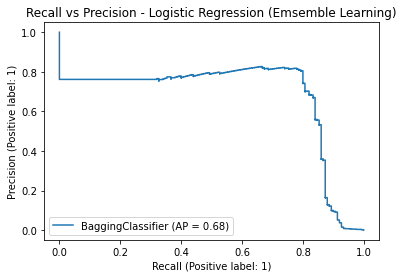

In [26]:
display = PrecisionRecallDisplay.from_estimator(log_reg, X_test, y_test)
display.ax_.set_title("Recall vs Precision - Logistic Regression (Emsemble Learning)")

Text(0, 0.5, 'True Positive Rate')

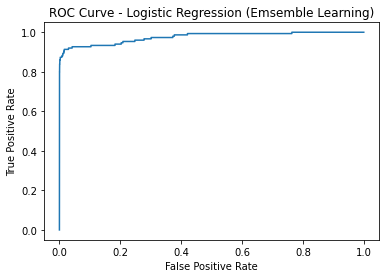

In [27]:
from sklearn.metrics import roc_curve

y_scores = log_reg.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

plt.plot(fpr, tpr)

plt.title("ROC Curve - Logistic Regression (Emsemble Learning)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")